<a href="https://colab.research.google.com/github/NagAR1612/CUSTOMER_SEGMENTATION/blob/master/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the required packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
dataset=pd.read_csv('CLV.csv')
dataset.head()#top 5 columns
len(dataset) 

303

In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

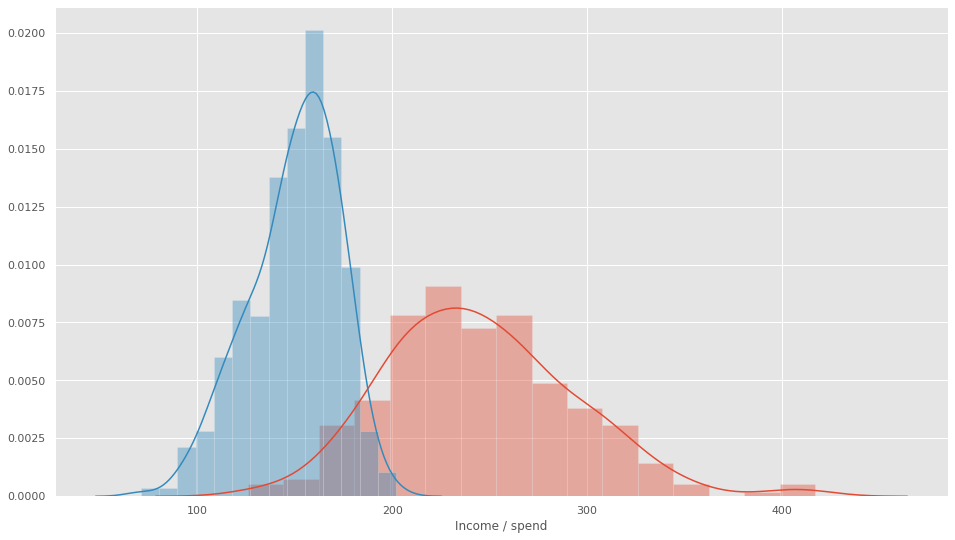

In [4]:
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

In [5]:
X=dataset.iloc[:,[0,1]].values

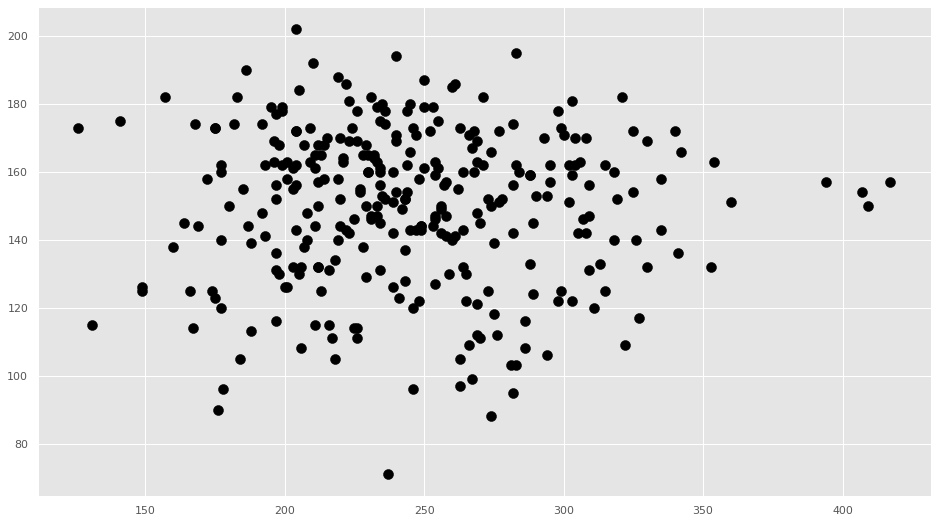

In [6]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

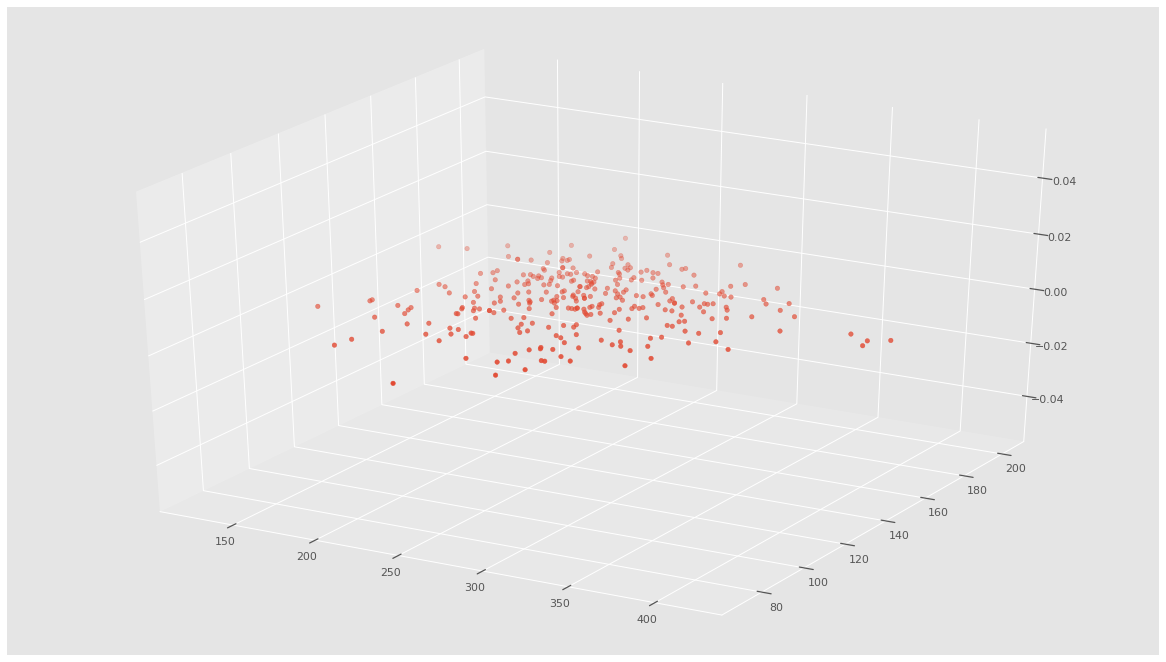

In [7]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

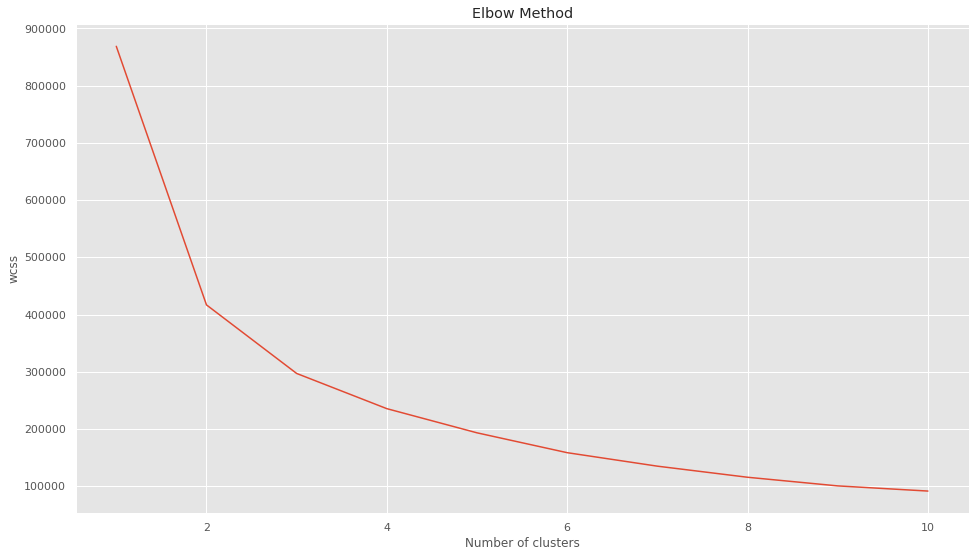

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.3496519600970819
For n_clusters=5, The Silhouette Coefficient is 0.33371155851769524
For n_clusters=6, The Silhouette Coefficient is 0.35975391689328834
For n_clusters=7, The Silhouette Coefficient is 0.35848220758537475
For n_clusters=8, The Silhouette Coefficient is 0.3588957368183914
For n_clusters=9, The Silhouette Coefficient is 0.35023718190534003
For n_clusters=10, The Silhouette Coefficient is 0.34532225076731227


In [10]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

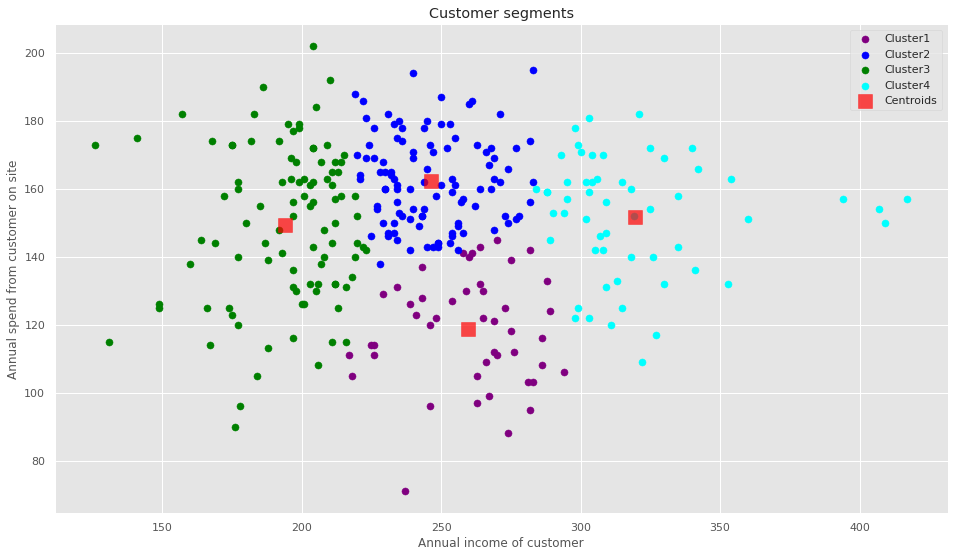

In [11]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()


In [13]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

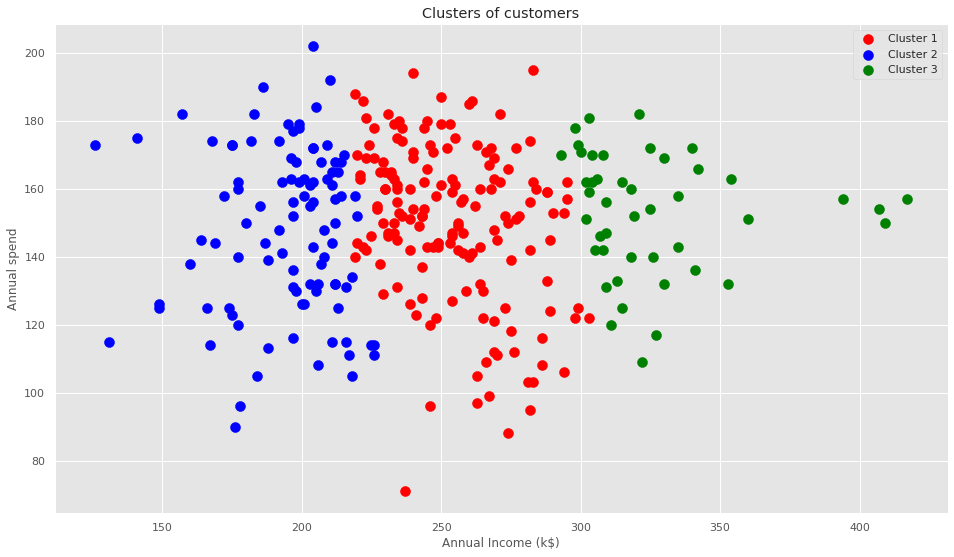

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()
